## Lets examine iRF results in python

In [1]:
import py_irf_benchmarks_utils
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../jupyter/utils')
from irf_jupyter_utils import _get_histogram

# recall output file
file_in = 'specs/iRF_mod01.yaml'
specs = py_irf_benchmarks_utils.yaml_to_dict(inp_yaml=file_in)

# specify output file
file_out = 'output/iRF_mod01_out.yaml'
bm = py_irf_benchmarks_utils.yaml_to_dict(inp_yaml=file_out)

## Plot some metrics

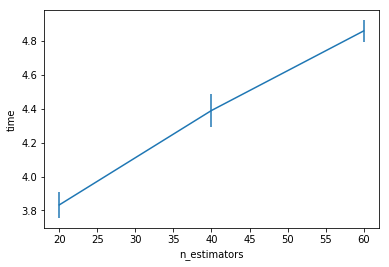

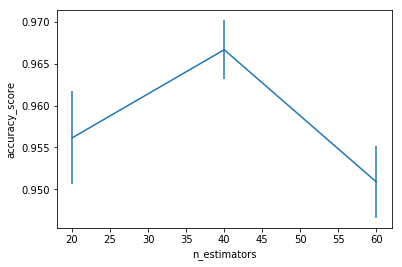

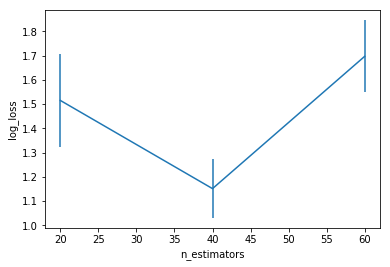

In [2]:
# calling a helper function
# third argument is x_axis, fourth argument is y_axis
py_irf_benchmarks_utils.plot_bm(bm, specs, 'n_estimators', 'time')
py_irf_benchmarks_utils.plot_bm(bm, specs, 'n_estimators', 'accuracy_score')
py_irf_benchmarks_utils.plot_bm(bm, specs, 'n_estimators', 'log_loss')

## Lets look at feature importances from the last iteration of iRF

The results printed in the notebook below are for n_estimators = 60

In [3]:
# Print the feature importance rankings from one trial
print("Feature ranking:")

feature_importances = bm[2]['feature_importances'][0]
feature_importances_rank_idx = np.argsort(feature_importances)[::-1]

for f in range(len(feature_importances)):
    print("%d. feature %d (%f)" % (f + 1
                                   , feature_importances_rank_idx[f]
                                   , feature_importances[feature_importances_rank_idx[f]]))



Feature ranking:
1. feature 27 (0.338785)
2. feature 22 (0.275232)
3. feature 7 (0.157604)
4. feature 23 (0.135695)
5. feature 20 (0.060010)
6. feature 21 (0.017022)
7. feature 1 (0.006363)
8. feature 13 (0.003972)
9. feature 0 (0.003048)
10. feature 6 (0.000825)
11. feature 24 (0.000456)
12. feature 4 (0.000371)
13. feature 3 (0.000312)
14. feature 26 (0.000157)
15. feature 12 (0.000150)
16. feature 9 (0.000000)
17. feature 2 (0.000000)
18. feature 5 (0.000000)
19. feature 8 (0.000000)
20. feature 29 (0.000000)
21. feature 10 (0.000000)
22. feature 11 (0.000000)
23. feature 28 (0.000000)
24. feature 15 (0.000000)
25. feature 16 (0.000000)
26. feature 17 (0.000000)
27. feature 18 (0.000000)
28. feature 19 (0.000000)
29. feature 25 (0.000000)
30. feature 14 (0.000000)


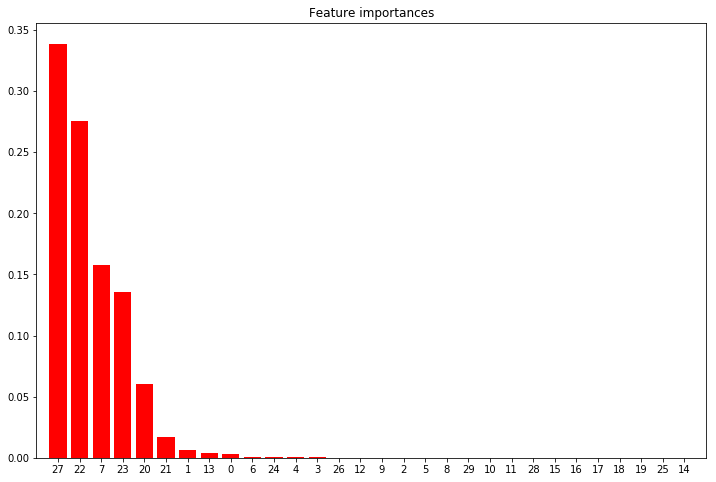

In [4]:
# Plot the feature importance rankings from one trial

width = 12
height = 8
plt.figure(figsize=(width, height))
plt.title("Feature importances")
plt.bar(range(len(feature_importances))
        , feature_importances[feature_importances_rank_idx]
        , color="r"
        , align="center")

plt.xticks(range(len(feature_importances)), feature_importances_rank_idx)
plt.xlim([-1, len(feature_importances)])
plt.show()

In [5]:
# lets look at the top 5 features across the trials
for i in range(specs['n_trials'][0]):
    feature_importances = bm[2]['feature_importances'][i]
    feature_importances_rank_idx = np.argsort(feature_importances)[::-1]
    print('trial'+str(i), feature_importances_rank_idx[0:5])

trial0 [27 22  7 23 20]
trial1 [27 22 23  7 20]
trial2 [27 22  7 23 20]
trial3 [27 22 23  7 20]
trial4 [27 22  7 23 20]


## Examine stability scores

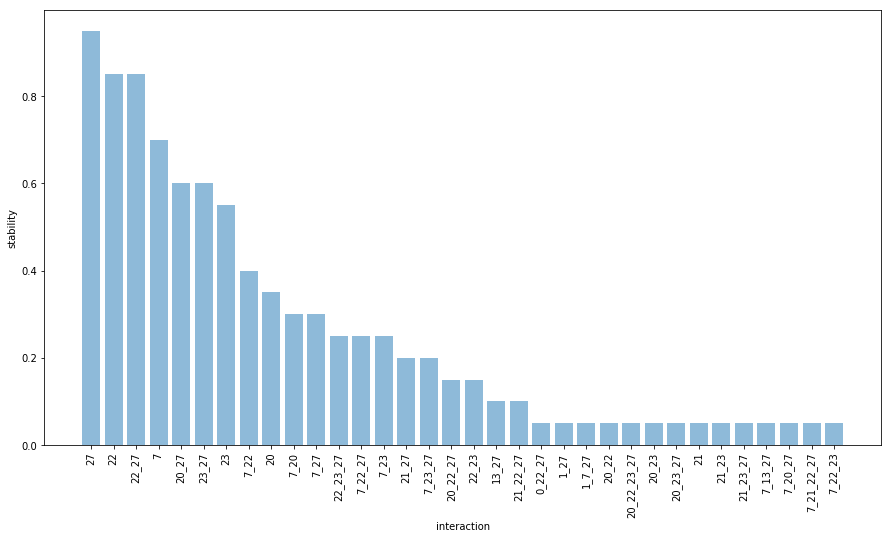

In [6]:
# plot stability scores for one trial
stability_scores = bm[2]['stability_all'][0]
_get_histogram(stability_scores, sort = True)

In [7]:
# examine top 5 stability scores across trials
for i in range(specs['n_trials'][0]):
    stability_scores = bm[2]['stability_all'][i]
    data_y = sorted(stability_scores.values(), reverse=True)
    data_x = sorted(stability_scores, key=stability_scores.get, reverse=True)
    print('trial'+str(i), data_x[0:5])

trial0 ['27', '22', '22_27', '7', '20_27']
trial1 ['7', '22', '23', '27', '23_27']
trial2 ['27', '22_27', '23_27', '23', '22']
trial3 ['27', '7', '22_27', '23_27', '22']
trial4 ['27', '23_27', '22', '22_27', '23']
